# Bank Marketing Prediction

### Tasks to perform
Read in the file and get basic information about the data, including numerical summaries.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
df = pd.read_csv("C:\\Users\\RUSHABH\\OneDrive\\Desktop\\Rushabh K\\bank-marketing.csv")
print("Rows {} and Columns {}".format(df.shape[0],df.shape[1]))
df.head()

Rows 45211 and Columns 19


,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


* Dataset dose not contains any null or missing values

In [4]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### ~ Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [5]:
df.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

* It seems that pdays column contains so much '-1' value i.e. upto 75% . It shows that the customers with values -1 have not been able to make with previous campaing. Since they have no any relation with the bank that much, we must exclude that data. By doing this we may know that how much customers been able to make it to the campaing.

#### ~ Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

In pdays '-1' have been used as indicator not an value. Hence treating these values as missing. Ignore these values in our average/median/state calculations. Keep it NaN. Wherever pdays is -1, replace with NaN

In [6]:
df1=df.copy()
df1.drop(df1[df1['pdays'] < 0].index, inplace = True) 
df1.pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

* This time mean and median has changed significantly because we have removed the case where pdays value is -1 i.e. we have removed the customer that were not contacted previously for campaign.

#### ~ Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

<AxesSubplot:ylabel='education'>

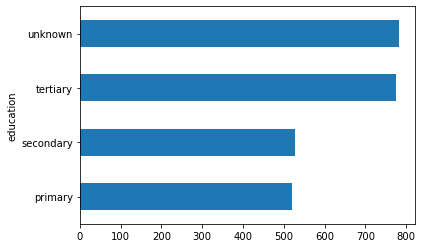

In [7]:
df1.groupby(['education'])['balance'].median().plot.barh()

* Thus, We can conclude from graph that customer with Unknown level of education has highest median value for balance.

#### ~ Make a box plot for pdays. Do you see any outliers?

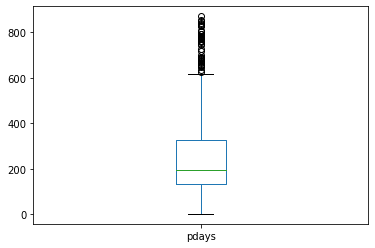

In [8]:
df1.pdays.plot.box()
plt.show()

* Yes, Outliers are present in pdays column. 

Boxplot with no Outliers


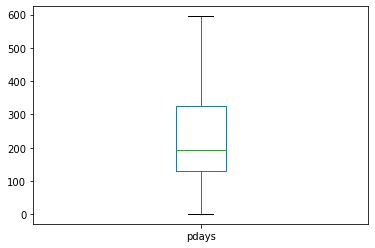

In [9]:
# Handling the Outliers
df2 = df1[df1['pdays'] >= 600]
df1 = df1.drop(df2.index,axis=0)
print('Boxplot with no Outliers')
df1.pdays.plot.box()
plt.show()

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8205 entries, 24060 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        8205 non-null   int64 
 1   job        8205 non-null   object
 2   salary     8205 non-null   int64 
 3   marital    8205 non-null   object
 4   education  8205 non-null   object
 5   targeted   8205 non-null   object
 6   default    8205 non-null   object
 7   balance    8205 non-null   int64 
 8   housing    8205 non-null   object
 9   loan       8205 non-null   object
 10  contact    8205 non-null   object
 11  day        8205 non-null   int64 
 12  month      8205 non-null   object
 13  duration   8205 non-null   int64 
 14  campaign   8205 non-null   int64 
 15  pdays      8205 non-null   int64 
 16  previous   8205 non-null   int64 
 17  poutcome   8205 non-null   object
 18  response   8205 non-null   object
dtypes: int64(8), object(11)
memory usage: 1.3+ MB


#### ~ The final goal is to make a predictive model to predict if the customer will respond positively to the campaign or not. The target variable is “response”. So performing bi-variate analysis to identify the features that are directly associated with the target variable.

##### Bi- variate Analysis

##### Converting the response variable to a convenient form

In [11]:
df1.response.value_counts(normalize=True)

no     0.77014
yes    0.22986
Name: response, dtype: float64

In [12]:
df1.replace({'response': {"yes": 1,'no':0}},inplace=True)
df1.response.value_counts()

0    6319
1    1886
Name: response, dtype: int64

In [13]:
df1.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,0
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,1
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,1
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,0
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,1


#### ~ Make suitable plots for associations with numerical features and categorical features

* Identifying categorical & numerical columns

In [14]:
cols = df1.columns.to_list()
num_cols= df1._get_numeric_data().columns.to_list()
cat_cols = list(set(cols) - set(num_cols))

print('Numerical Columns')
print(num_cols)
print('\nCategorical Columns')
print(cat_cols)

Numerical Columns
['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response']

Categorical Columns
['marital', 'loan', 'housing', 'poutcome', 'default', 'targeted', 'month', 'job', 'contact', 'education']


* Visualizing Numerical Features with Response

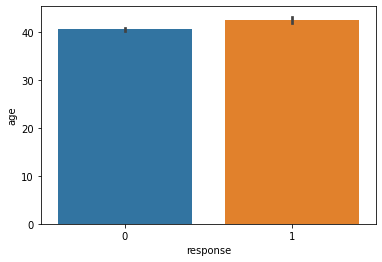

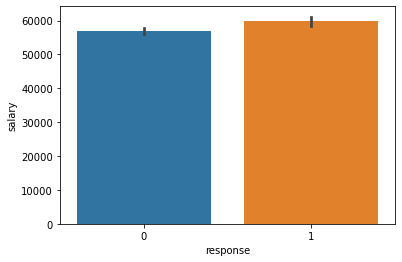

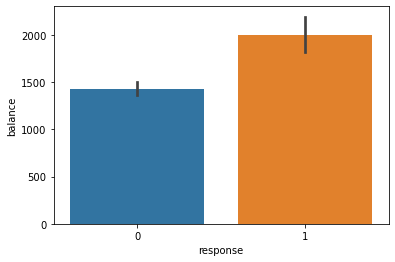

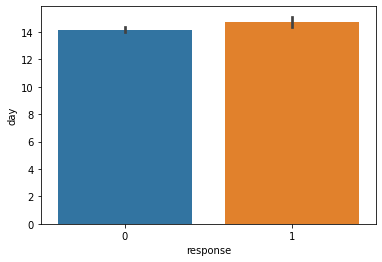

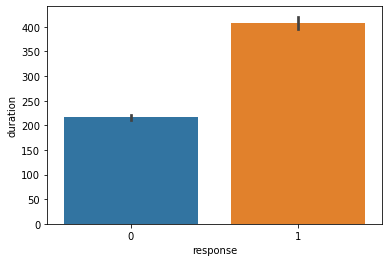

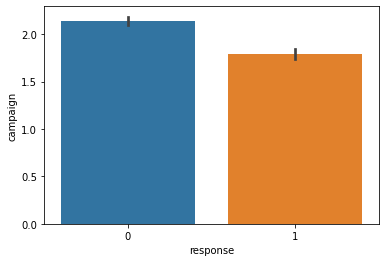

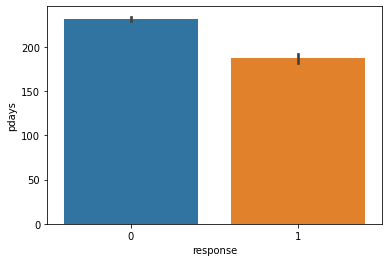

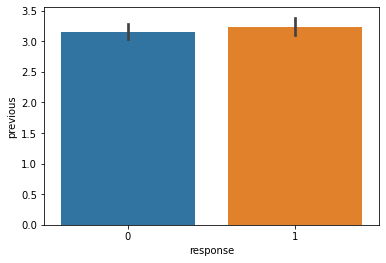

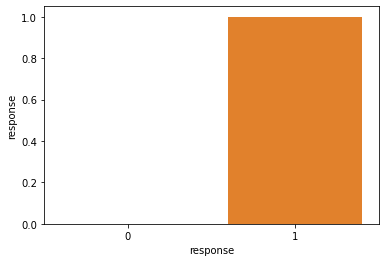

In [15]:
for i in df1[num_cols]:
    sns.barplot(df1['response'],df1[i])
    plt.show()

* Visualizing Categorical Features with Response

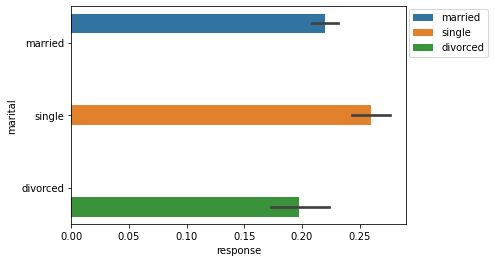

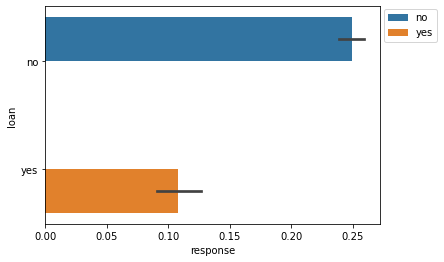

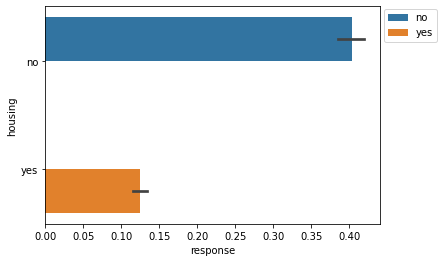

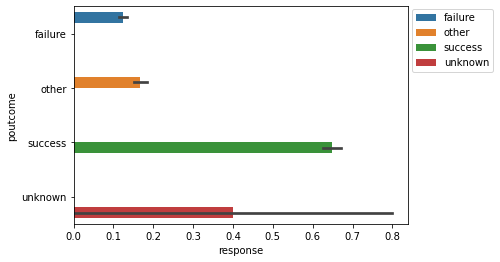

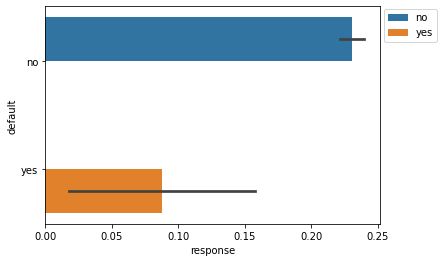

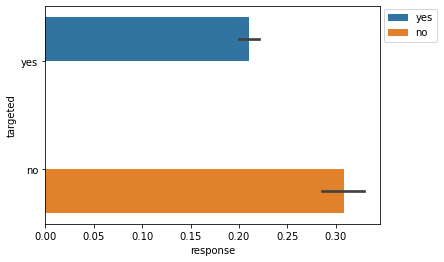

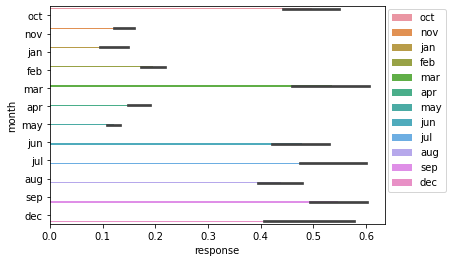

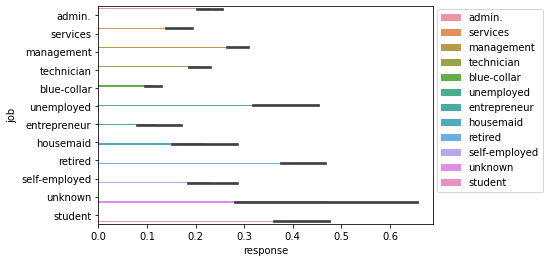

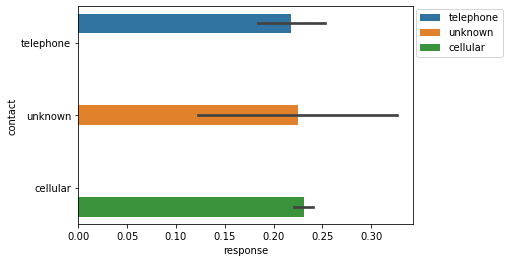

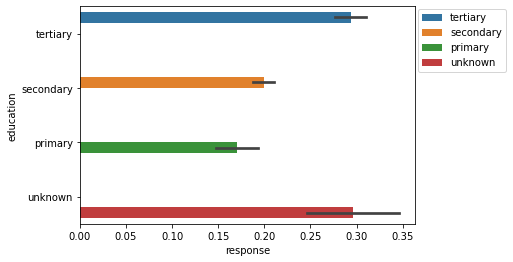

In [16]:
for i in df1[cat_cols]:
    sns.barplot(df1['response'],df1[i],hue=df1[i])
    plt.legend(bbox_to_anchor=(1.01,.99),borderaxespad=0,loc=2)
    plt.show()

#### ~ Are the features about the previous campaign data useful?

* Yes, The features about previous campaign data is useful.

#### ~ Are pdays and poutcome associated with the target?

* Yes, pdays & poutcome is associated with the target variable 'response'

#### ~ If yes, and if you plan to use them – how do you handle the pdays column with a value of -1 where the previous campaign data is missing? Explain your approach and your decision.

* -1 value in pdays or missing values or outliers are ignored because these are the customers whose are no any longer related with the bank, So it's better for model accurracy to drop them & go on with further process.

#### ~ The necessary transformations for the categorical variables and the numeric variables

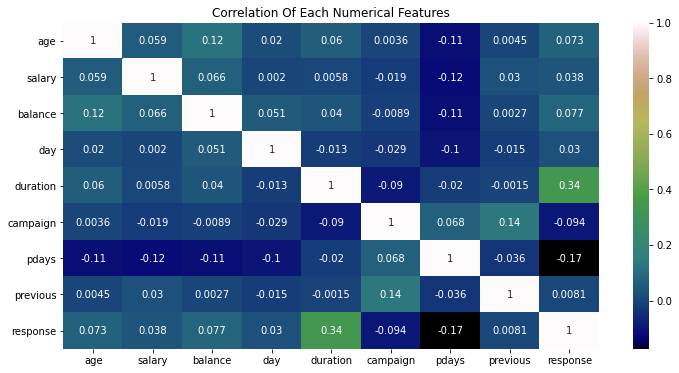

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(df1.corr(),annot=True,cmap='gist_earth')
plt.title("Correlation Of Each Numerical Features")
plt.show()

* we can see that duration variable is highly correlated with response variable 'Response Flag' . Whereas pdays variable is not highly correlated with response variable 'Response Flag'.

<Figure size 720x576 with 0 Axes>

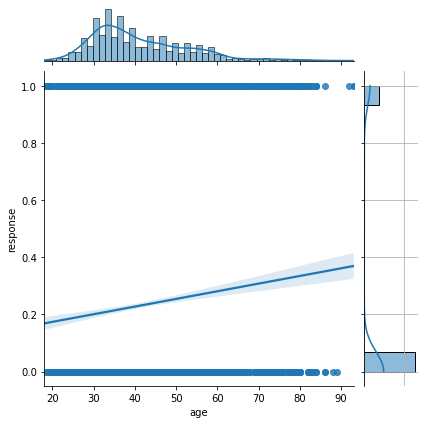

<Figure size 720x576 with 0 Axes>

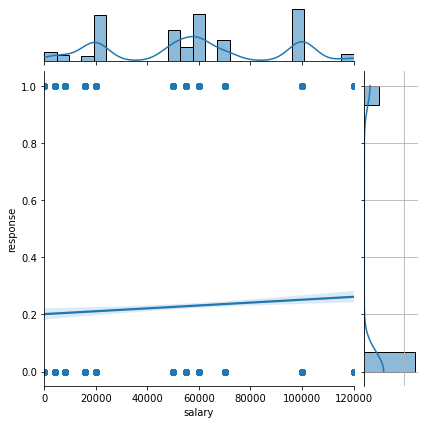

<Figure size 720x576 with 0 Axes>

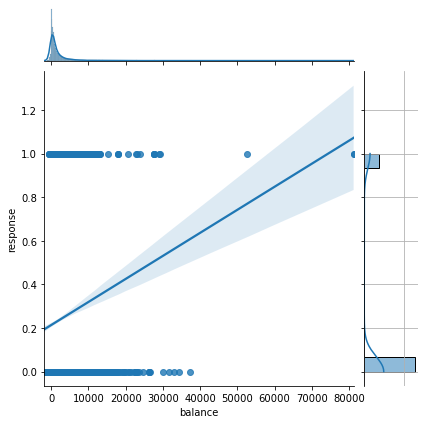

<Figure size 720x576 with 0 Axes>

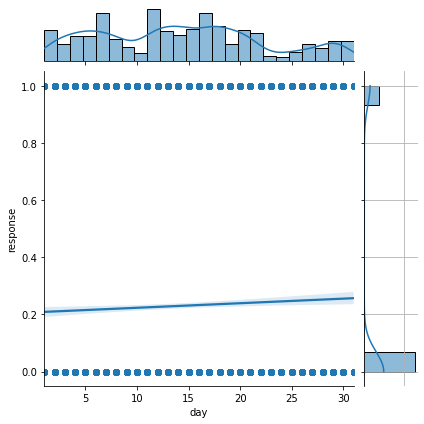

<Figure size 720x576 with 0 Axes>

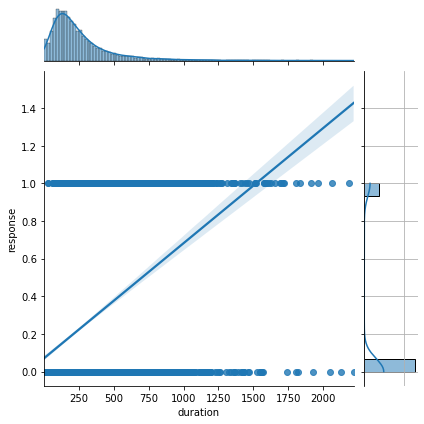

<Figure size 720x576 with 0 Axes>

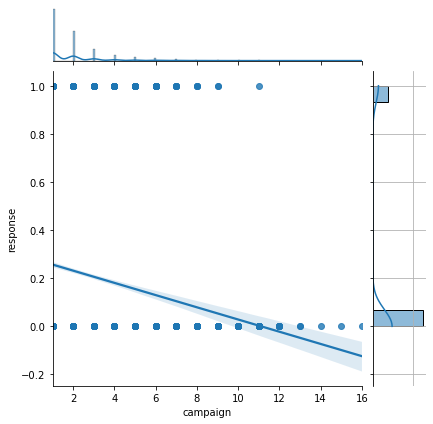

<Figure size 720x576 with 0 Axes>

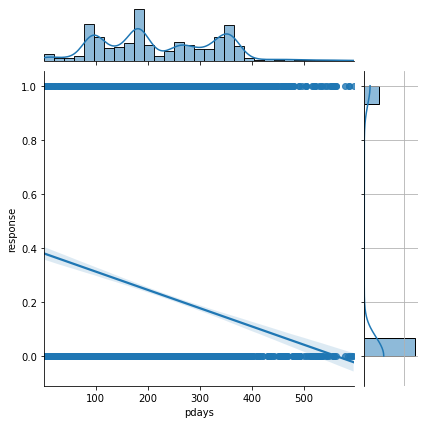

<Figure size 720x576 with 0 Axes>

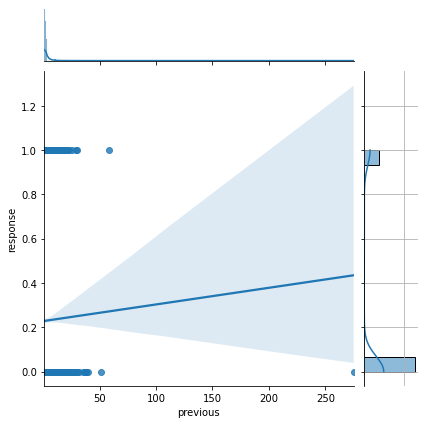

In [18]:
for col in num_cols[:-1]:
    plt.figure(figsize=(10,8))
    sns.jointplot(x = df1[col],y = df1["response"],kind='reg')
    plt.xlabel(col,fontsize = 15)
    plt.ylabel("Response",fontsize = 15)
    plt.grid()
    plt.show()

* Label Encoding of Categorical Variables.

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
df3 = df1[cat_cols].apply(LabelEncoder().fit_transform)
df3.head()

,marital,loan,housing,poutcome,default,targeted,month,job,contact,education
24060,1,0,0,0,0,1,10,0,1,2
24062,2,1,1,1,0,1,10,0,1,1
24064,1,0,1,0,0,1,10,7,1,1
24072,1,0,1,1,0,1,10,4,1,2
24077,1,0,1,0,0,1,10,4,1,2


In [21]:
df4 = df3.join(df1[num_cols])
df4.head()

,marital,loan,housing,poutcome,default,targeted,month,job,contact,education,age,salary,balance,day,duration,campaign,pdays,previous,response
24060,1,0,0,0,0,1,10,0,1,2,33,50000,882,21,39,1,151,3,0
24062,2,1,1,1,0,1,10,0,1,1,42,50000,-247,21,519,1,166,1,1
24064,1,0,1,0,0,1,10,7,1,1,33,70000,3444,21,144,1,91,4,1
24072,1,0,1,1,0,1,10,4,1,2,36,100000,2415,22,73,1,86,4,0
24077,1,0,1,0,0,1,10,4,1,2,36,100000,0,23,140,1,143,3,1


In [22]:
df4.corr()

,marital,loan,housing,poutcome,default,targeted,month,job,contact,education,age,salary,balance,day,duration,campaign,pdays,previous,response
marital,1.000000,-0.055374,-0.056352,0.045484,-0.005753,-0.255486,-0.024663,0.072865,-0.028908,0.122070,-0.415511,-0.043422,-0.020178,0.016389,-0.009392,-0.008772,-0.006392,0.005519,0.049751
loan,-0.055374,1.000000,0.112240,-0.103648,0.052473,0.070190,-0.000715,-0.033795,-0.028964,-0.048812,-0.009009,0.014393,-0.084921,0.008988,-0.032730,0.008033,0.022819,0.013683,-0.115212
housing,-0.056352,0.112240,1.000000,-0.287046,0.022611,0.086574,0.017032,-0.132182,-0.072051,-0.127906,-0.179517,-0.034703,-0.109598,-0.067401,-0.072505,0.062326,0.365964,0.007706,-0.320280
poutcome,0.045484,-0.103648,-0.287046,1.000000,-0.025767,-0.071648,-0.018198,0.066452,0.024316,0.083959,0.052255,0.013536,0.051497,0.016912,0.110449,-0.001180,-0.243675,0.042900,0.425229
default,-0.005753,0.052473,0.022611,-0.025767,1.000000,0.019620,0.020435,-0.021111,-0.019521,-0.013600,-0.027905,0.000392,-0.045128,-0.000964,-0.002728,-0.002308,0.038702,0.012505,-0.028256
targeted,-0.255486,0.070190,0.086574,-0.071648,0.019620,1.000000,0.011374,-0.091083,0.024672,-0.632761,0.141069,-0.227927,-0.052601,-0.025070,-0.016042,0.017189,0.084503,-0.002387,-0.092791
month,-0.024663,-0.000715,0.017032,-0.018198,0.020435,0.011374,1.000000,-0.002806,0.041944,-0.012213,0.014876,0.018868,0.016244,-0.024655,-0.034737,0.024708,0.010131,0.012016,-0.009015
job,0.072865,-0.033795,-0.132182,0.066452,-0.021111,-0.091083,-0.002806,1.000000,0.000723,0.159377,-0.020727,0.115646,0.041900,0.014952,0.023745,-0.009013,-0.116824,-0.000903,0.079660
contact,-0.028908,-0.028964,-0.072051,0.024316,-0.019521,0.024672,0.041944,0.000723,1.000000,-0.050515,0.175935,-0.035471,0.038262,-0.012872,-0.023321,0.077261,0.012072,0.037374,-0.007714
education,0.122070,-0.048812,-0.127906,0.083959,-0.013600,-0.632761,-0.012213,0.159377,-0.050515,1.000000,-0.120713,0.422500,0.074225,0.023110,-0.001378,-0.024108,-0.157076,0.000963,0.108581


### Predictive model 1: Logistic regression

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
np.random.seed(42)

In [24]:
X = df4.drop("response", axis=1)
X.head()

,marital,loan,housing,poutcome,default,targeted,month,job,contact,education,age,salary,balance,day,duration,campaign,pdays,previous
24060,1,0,0,0,0,1,10,0,1,2,33,50000,882,21,39,1,151,3
24062,2,1,1,1,0,1,10,0,1,1,42,50000,-247,21,519,1,166,1
24064,1,0,1,0,0,1,10,7,1,1,33,70000,3444,21,144,1,91,4
24072,1,0,1,1,0,1,10,4,1,2,36,100000,2415,22,73,1,86,4
24077,1,0,1,0,0,1,10,4,1,2,36,100000,0,23,140,1,143,3


In [25]:
y= df4[['response']]
y.head()

,response
24060,0
24062,1
24064,1
24072,0
24077,1


In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [27]:
lr = LogisticRegression()

In [28]:
lr.fit(X_train,y_train)

LogisticRegression()

In [29]:
cv_score= cross_val_score(lr,X_train,y_train, cv=5)
np.mean(cv_score)

0.7783370562666023

In [32]:
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1290
           1       0.56      0.23      0.32       351

    accuracy                           0.80      1641
   macro avg       0.69      0.59      0.60      1641
weighted avg       0.76      0.80      0.76      1641



In [33]:
confusion_matrix(y_pred,y_test)

array([[1228,  272],
       [  62,   79]], dtype=int64)

In [34]:
f1_score(y_pred,y_test)

0.32113821138211385

### Predictive model 1: Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rfc = RandomForestClassifier(max_depth=5, random_state=42,max_leaf_nodes=50)

In [37]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=50, random_state=42)

In [38]:
cv1_score= cross_val_score(rfc,X_train,y_train, cv=5)
np.mean(cv1_score)

0.8394270243159401

In [39]:
y_pred1 = rfc.predict(X_test)

In [40]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1290
           1       0.75      0.46      0.57       351

    accuracy                           0.85      1641
   macro avg       0.81      0.71      0.74      1641
weighted avg       0.84      0.85      0.84      1641



In [41]:
f1_score(y_test,y_pred1)

0.573943661971831

In [42]:
confusion_matrix(y_test,y_pred1)

array([[1236,   54],
       [ 188,  163]], dtype=int64)

In [44]:
from sklearn.metrics import roc_auc_score

In [45]:
roc_auc_score(y_test,y_pred1)

0.7112634996355927